<a href="https://colab.research.google.com/github/aryanpawar09/CaliforniaHousing/blob/main/EndToEndMLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Import the Libraries***

In [1]:
import sklearn # algorithm for ml
import numpy as np # array
import pandas as pd # dataframe - sql database table

In [2]:
# pandas ----> numpy array ---> sklearn algorithm

In [3]:
np.random.seed(42)

In [4]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

In [6]:
import warnings
warnings.filterwarnings(action="ignore", message="internal gelsd")

# ***Load the Dataset***

In [7]:
HOUSING_PATH = "/content/housing.csv"

In [8]:
HOUSING_PATH

'/content/housing.csv'

In [9]:
housing = pd.read_csv(HOUSING_PATH)

In [10]:
housing.abs?

In [11]:
help(housing.abs)

Help on method abs in module pandas.core.generic:

abs() -> 'Self' method of pandas.core.frame.DataFrame instance
    Return a Series/DataFrame with absolute numeric value of each element.
    
    This function only applies to elements that are all numeric.
    
    Returns
    -------
    abs
        Series/DataFrame containing the absolute value of each element.
    
    See Also
    --------
    numpy.absolute : Calculate the absolute value element-wise.
    
    Notes
    -----
    For ``complex`` inputs, ``1.2 + 1j``, the absolute value is
    :math:`\sqrt{ a^2 + b^2 }`.
    
    Examples
    --------
    Absolute numeric values in a Series.
    
    >>> s = pd.Series([-1.10, 2, -3.33, 4])
    >>> s.abs()
    0    1.10
    1    2.00
    2    3.33
    3    4.00
    dtype: float64
    
    Absolute numeric values in a Series with complex numbers.
    
    >>> s = pd.Series([1.2 + 1j])
    >>> s.abs()
    0    1.56205
    dtype: float64
    
    Absolute numeric values in a Series w

In [12]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [13]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


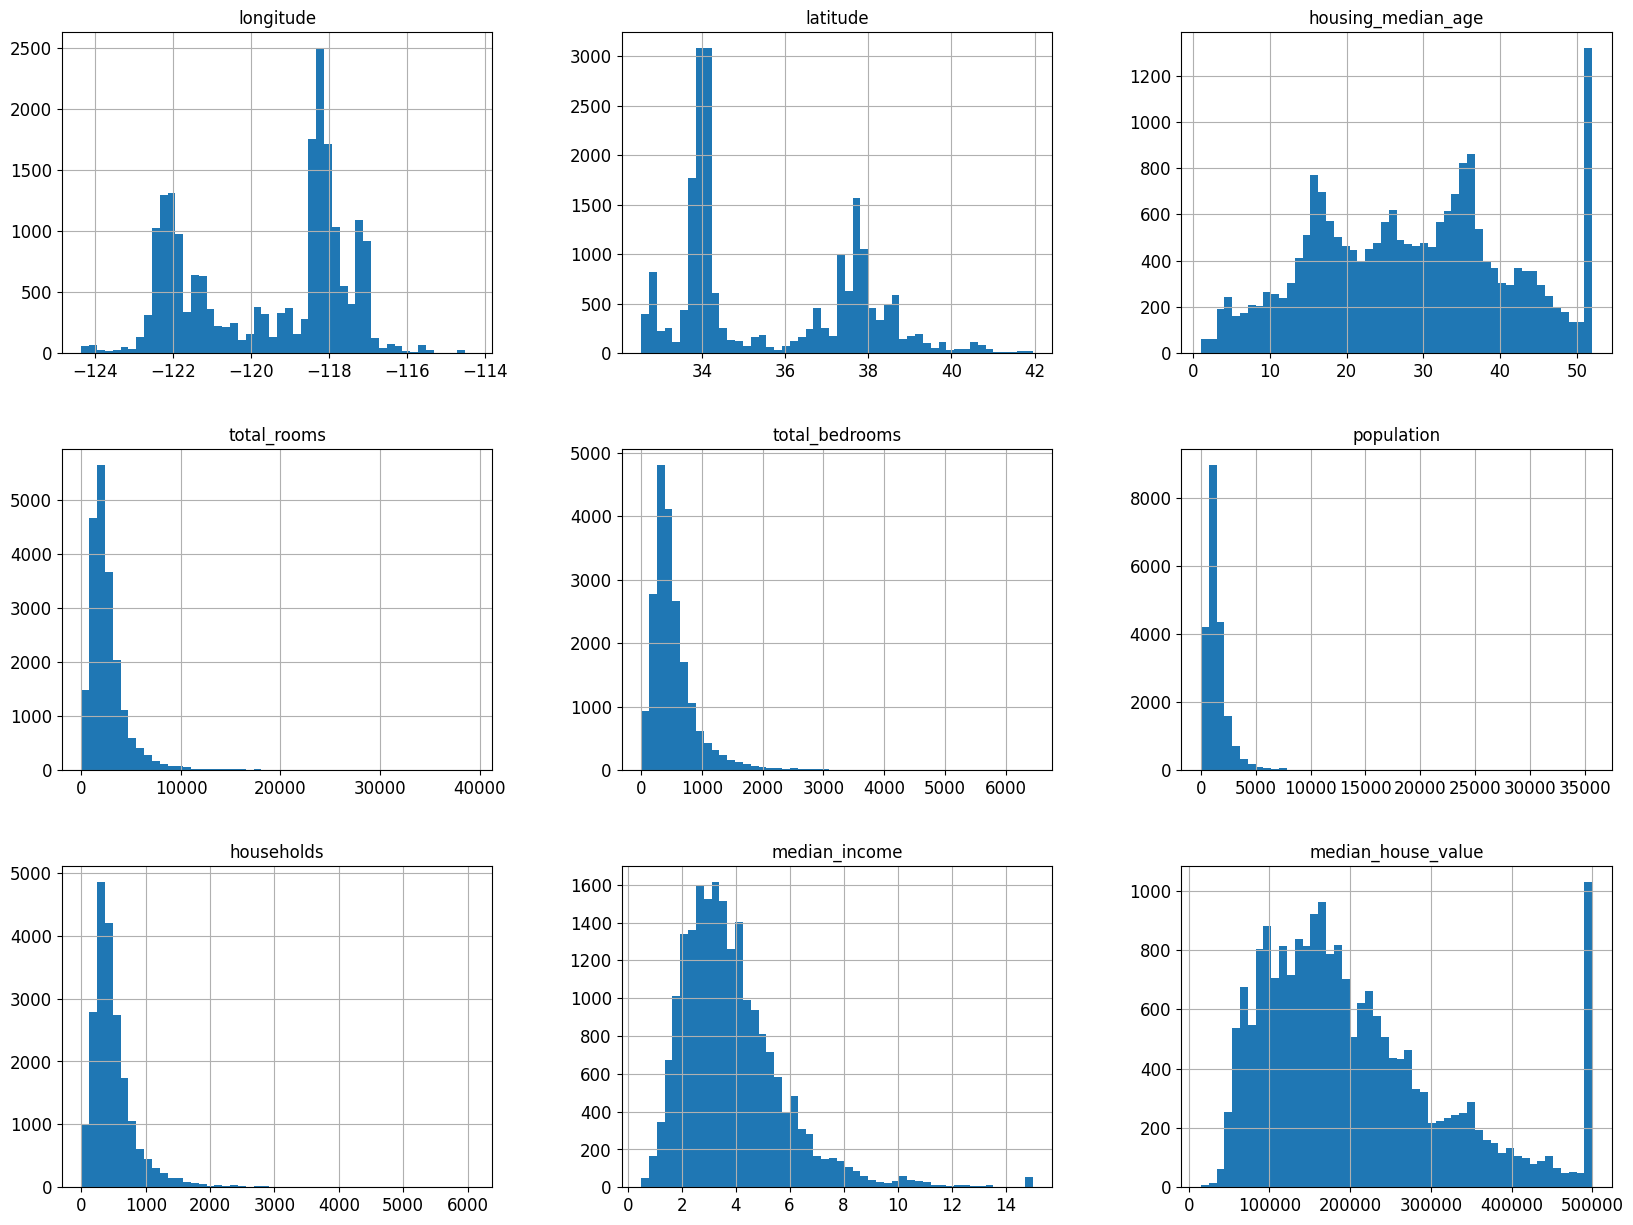

In [15]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

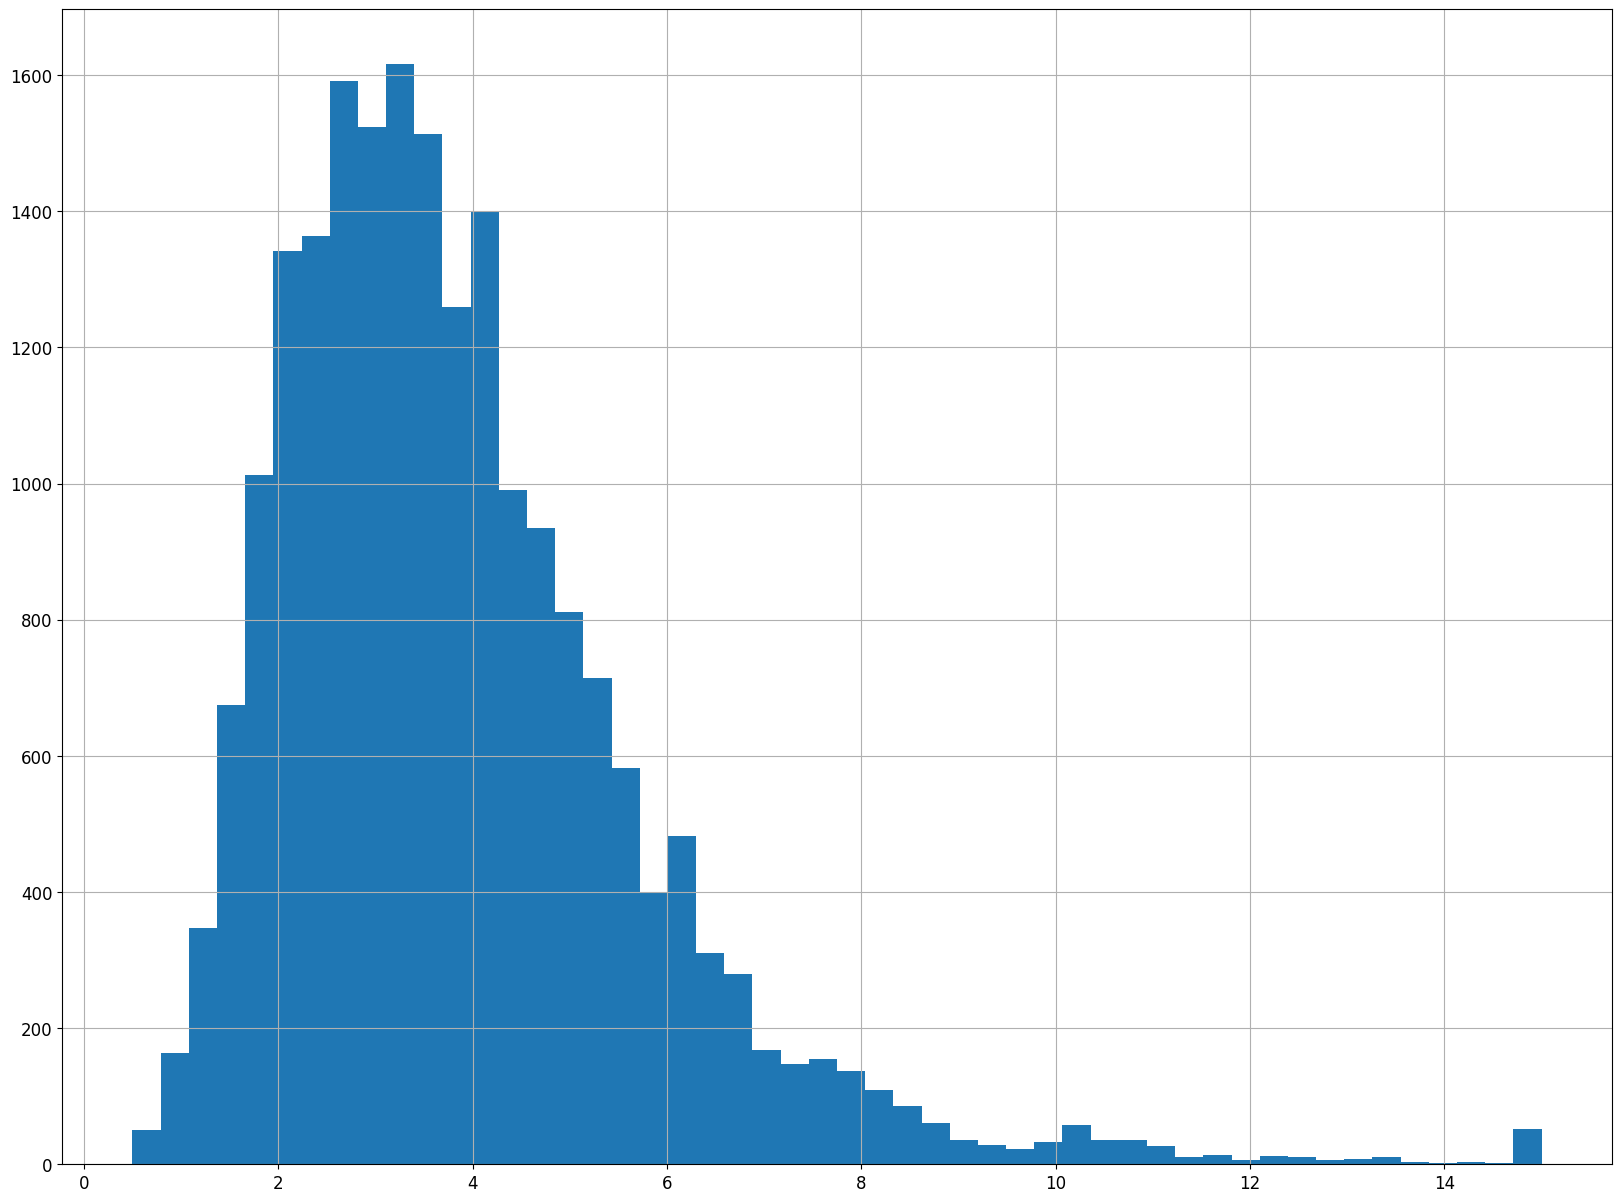

In [16]:
housing["median_income"].hist(bins=50,figsize=(20,15))
plt.show()

<Axes: >

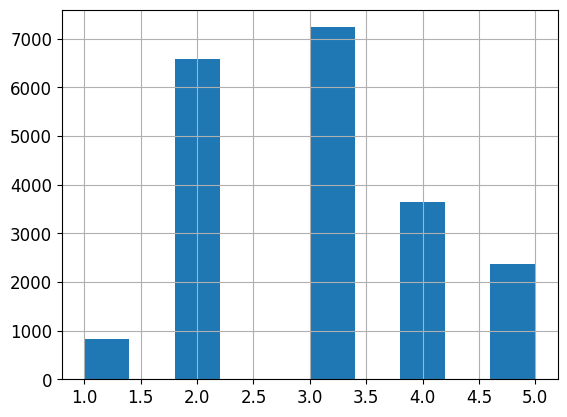

In [17]:
housing["income_cat"] = pd.cut(housing["median_income"],
                              bins=[0.,1.5,3.0,4.5,6.,np.inf],
                              labels=[1,2,3,4,5])

housing["income_cat"].hist()

# ***Split the Dataset***

In [18]:
housing_numeric = housing.select_dtypes(include=['number'])
housing_numeric.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [19]:
housing_numeric.corr()["median_house_value"]

,median_house_value
longitude,-0.045967
latitude,-0.144160
housing_median_age,0.105623
total_rooms,0.134153
total_bedrooms,0.049686
population,-0.024650
households,0.065843
median_income,0.688075
median_house_value,1.000000


In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

In [21]:
split = StratifiedShuffleSplit(n_splits=1 , test_size=0.2, random_state=42)
for train_index , test_index in split.split(housing, housing["income_cat"]):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [22]:
housing.shape , strat_train_set.shape , strat_test_set.shape

((20640, 11), (16512, 11), (4128, 11))

Now we will drop the income_cat column from both the train and test set since it is the attribute that our model will predict , we will use drop method

In [23]:
# for set_ in (strat_train_set, strat_test_set):
#   set_.drop("income_cat",axis=1, inplace=True)

# ran one time so it will shoe error if we try to run it again

# ***Visualise the Geographic Distribution of the Data***

In [24]:
housing = strat_train_set.copy() #now it only represents 80% of dataset not the whole dataset

In [25]:
# import matplotlib.image as mpimg
# california_img=mpimg.imread('/california-house-price-trends.png')
# ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
#                        s=housing['population']/100, label="Population",
#                        c="median_house_value", cmap=plt.get_cmap("jet"),
#                        colorbar=False, alpha=0.4,
#                       )
# plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
#            cmap=plt.get_cmap("jet"))
# plt.ylabel("Latitude", fontsize=14)
# plt.xlabel("Longitude", fontsize=14)

# prices = housing["median_house_value"]
# tick_values = np.linspace(prices.min(), prices.max(), 11)
# cbar = plt.colorbar(ticks=tick_values/prices.max())
# cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
# cbar.set_label('Median House Value', fontsize=16)

# plt.legend(fontsize=16)
# plt.show()

#use an actual picture instead because this is not right



# ***Create a Correation Matrix***

In [26]:
housing["rooms_per_household"]= housing["total_rooms"]/housing["households"]
housing["bedroom_per_room"]= housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [27]:
corr_matrix = housing_numeric.corr()

In [28]:
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
households,0.065843
total_bedrooms,0.049686
population,-0.024650
longitude,-0.045967
latitude,-0.144160


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

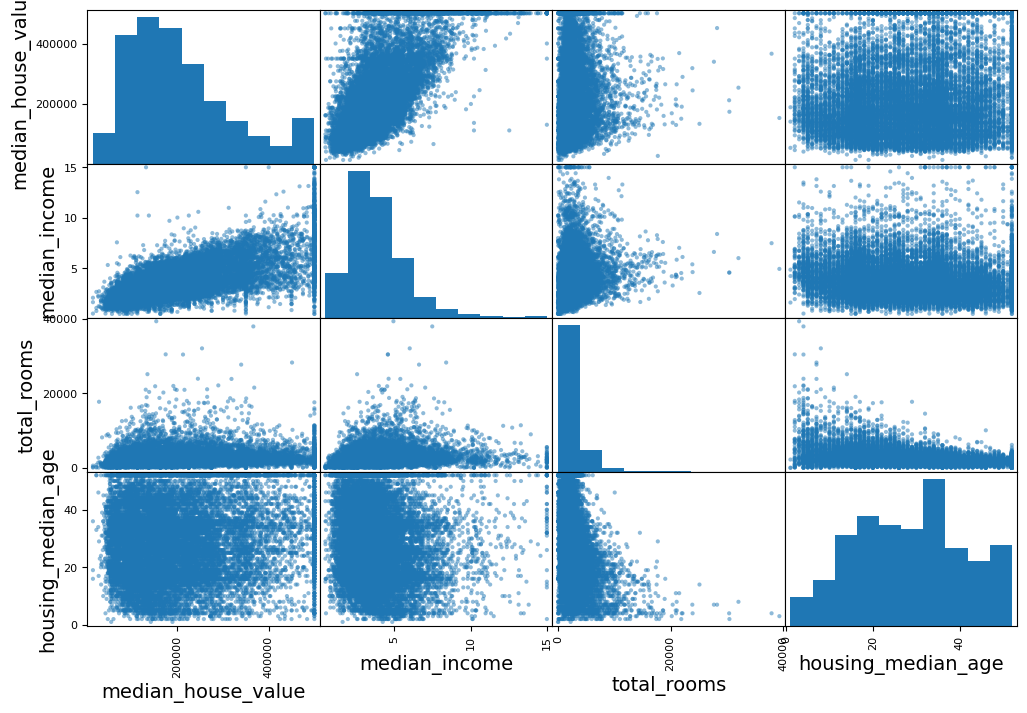

In [29]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

In [30]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedroom_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


# ***Fill in the Missing Data***

In [31]:
housing = strat_train_set.drop("median_house_value",axis=1)

In [32]:
housing_labels =strat_train_set["median_house_value"].copy()

Now for the missing values we will consider the median value for that featue. We are not considering mean since median is a better measure of central tendency as it takes into account the outlier. We will set the strategy parameter to "median" in the SimpleImputer class

In [33]:
from sklearn.impute import SimpleImputer

In [34]:
imputer = SimpleImputer(strategy="median")

In [35]:
housing_num = housing.drop("ocean_proximity", axis=1) #for only numerical value tho it is not in the table but for the information

In [36]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [37]:
X=imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [38]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,income_cat
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,2.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,5.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,2.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,2.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,3.0
...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,4.0
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,2.0
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,3.0
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,3.0


What is One-Hot Encoding?
One-Hot Encoding is a method used to convert categorical data (labels or text categories) into a numerical format that machine learning models can understand.

Why is One-Hot Encoding Needed?
Machine learning models work with numerical data. However, categorical data (e.g., colors: Red, Blue, Green) cannot be directly fed into models. One-Hot Encoding solves this problem by converting categories into binary (0s and 1s) vectors.

When to Use One-Hot Encoding?
✅ Use it when:

The categorical variable does not have an ordinal relationship (e.g., Colors, Cities, Gender).
The number of unique categories is not too large (to avoid high-dimensional data).
❌ Avoid it when:

The dataset has too many unique categories (e.g., 10,000+ different cities). In such cases, Target Encoding or Embedding Layers may be better.

# ***Handling Categorical Attributes***

In [39]:
housing_cat = housing[["ocean_proximity"]]

In [40]:
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
cat_encoder = OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [43]:
print(housing_cat_1hot[:10])

  (0, 1)	1.0
  (1, 4)	1.0
  (2, 1)	1.0
  (3, 4)	1.0
  (4, 0)	1.0
  (5, 3)	1.0
  (6, 0)	1.0
  (7, 0)	1.0
  (8, 0)	1.0
  (9, 0)	1.0


In [44]:
housing_cat_1hot[:10].toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

# ***Creating Custom Transformer***

In [45]:
from sklearn.base import BaseEstimator, TransformerMixin

In [46]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)


# ***Creating Tranformation Pipelines***

In [47]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names]

housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [48]:
housing_prepared = full_pipeline.fit_transform(housing)

# ***Train a Decision Tree Model***

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

The .fit() function is commonly used in machine learning models and data preprocessing to learn patterns from the data. Let's break it down with examples.

1️⃣ .fit() in Machine Learning Models
When you train a machine learning model, .fit() helps the model learn from the training data.

📌 Example with Scikit-Learn (Linear Regression)

python
Copy
Edit
from sklearn.linear_model import LinearRegression

model = LinearRegression()  # Create a model
model.fit(X_train, y_train)  # Train the model using training data
✔️ What happens?

The model learns the relationship between X_train (features) and y_train (target).
It calculates the best parameters (e.g., slope and intercept in linear regression).
2️⃣ .fit() in Data Preprocessing
In data preprocessing, .fit() helps analyze the data but doesn’t modify it. It prepares a transformation to apply later.

📌 Example with Label Encoding

python
Copy
Edit
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()  # Create an encoder
encoder.fit(["red", "green", "blue"])  # Learn unique categories
✔️ What happens?

The encoder remembers red → 0, green → 1, blue → 2, but doesn’t modify anything yet.
To actually transform the data, we use .transform():

python
Copy
Edit
encoded_colors = encoder.transform(["red", "blue", "green", "red"])
print(encoded_colors)  # Output: [0 2 1 0]
or use .fit_transform() to do both in one step:

python
Copy
Edit
encoded_colors = encoder.fit_transform(["red", "green", "blue", "red"])
3️⃣ .fit() vs .fit_transform()
Function	What It Does
.fit(X)	Learns from X, but doesn’t modify it
.transform(X)	Applies the learned transformation to X
.fit_transform(X)	Does both .fit(X) and .transform(X) together
📌 Example with StandardScaler (Feature Scaling)

python
Copy
Edit
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)  # Learns mean and standard deviation
X_scaled = scaler.transform(X_train)  # Applies transformation
or

python
Copy
Edit
X_scaled = scaler.fit_transform(X_train)  # Does both in one step
Summary
.fit() learns from the data but doesn’t apply changes.
.fit_transform() learns and applies the transformation.
In machine learning, .fit() trains models by adjusting parameters.

In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
housing_predictions =tree_reg.predict(housing_prepared)

In [53]:
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

The reason why the rmse value is 0 , is that we testing the model on the training set itself because it has memerized everything lol

# ***Train A Random Forest***

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
forest_reg = RandomForestRegressor(n_estimators=50 , random_state=42)
forest_reg.fit(housing_prepared , housing_labels)

RandomForestRegressor(n_estimators=50, random_state=42)

In [59]:
housing_predictions = forest_reg.predict(housing_prepared)


In [60]:
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18675.224916252282

# ***Fine Tune Your Model with Cross Validation***

k fold cross validation

In [61]:
def display_scores(scores):
  print("Scores: ", scores)
  print("Mean: ", scores.mean())
  print("Standard Deviation: ", scores.std())

In [63]:
from sklearn.model_selection import cross_val_score

In [71]:
scores = cross_val_score(tree_reg , housing_prepared , housing_labels,
                         scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores:  [69095.01988238 71333.26997148 69849.61914291 72936.01483788
 71212.08814592]
Mean:  70885.20239611462
Standard Deviation:  1325.9439372448026


In [70]:
forest_scores = cross_val_score(forest_reg , housing_prepared , housing_labels,
                         scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [50413.12385741 50180.09342616 50481.93929495 51927.16319029
 52205.79619781]
Mean:  51041.623193322725
Standard Deviation:  847.3453713387721


Clearly Random Forest is the better choice to select

# ***Fine Tune Your Model With Grid Search***

In [72]:
from sklearn.model_selection import GridSearchCV

In [74]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

In [75]:
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [76]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [77]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [78]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64794.30269596007 {'max_features': 2, 'n_estimators': 3}
56170.628706376316 {'max_features': 2, 'n_estimators': 10}
53112.07892952066 {'max_features': 2, 'n_estimators': 30}
61836.14128922096 {'max_features': 4, 'n_estimators': 3}
54015.050600771814 {'max_features': 4, 'n_estimators': 10}
51501.312925751794 {'max_features': 4, 'n_estimators': 30}
59654.781331729675 {'max_features': 6, 'n_estimators': 3}
52654.921131020776 {'max_features': 6, 'n_estimators': 10}
50743.74265388978 {'max_features': 6, 'n_estimators': 30}
60051.26348940765 {'max_features': 8, 'n_estimators': 3}
52909.31100796091 {'max_features': 8, 'n_estimators': 10}
50800.78516244517 {'max_features': 8, 'n_estimators': 30}
63176.30025923348 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54596.210174483705 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60999.682580275425 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
53236.2602917408 {'bootstrap': False, 'max_features': 3, 'n_estimator

# ***Analyze and evaluate best model***

In [79]:
final_model = grid_search.best_estimator_

In [84]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

In [81]:
X_test_prepared = full_pipeline.transform(X_test)

In [82]:
final_predictions = final_model.predict(X_test_prepared)

In [85]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [86]:
final_rmse

48557.33618531538

This is a very low rmse great job.

In [89]:
final_model.feature_importances_

array([6.76445809e-02, 6.24744883e-02, 4.48349664e-02, 1.82692423e-02,
       1.78441912e-02, 1.96046284e-02, 1.81345873e-02, 2.43728155e-01,
       1.64552239e-01, 5.15312129e-02, 1.00601503e-01, 5.56925429e-02,
       1.39077386e-02, 1.13027019e-01, 8.79969201e-05, 2.68765993e-03,
       5.37724723e-03])